In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score,adjusted_rand_score,rand_score
from yellowbrick.cluster import KElbowVisualizer
import numpy as np
import copy

In [2]:
data = pd.read_csv('pca_skills.csv')
data2 = pd.read_csv('encoded_skills_data.csv')
data3 = pd.read_csv('final_till_12_03.csv')

In [3]:
data3.head()

,Unnamed: 0,Unnamed: 0.1,roles,companies,locations,experience,skills,skill index
0,0,0,Data Scientist - Lead / Architect Wipro,Wipro,"'Kochi', ' Kolkata', ' Pune', ' Gurgaon', ' Ch...",5-10,"'data science', 'python', 'it skills', 'artifi...",-1.0
1,1,1,Urgent Requirement || Data Scientist || Noida,HCL,"'Noida', 'Delhi'",3-8,"'it skills', 'python', 'machine learning'",-1.0
2,2,2,Global Tax Automation & Operations - Data Scie...,Dell,'Bangalore',3-5,"'artificial intelligence', 'data science', 'it...",-1.0
3,4,4,Technical Architect/ Data Scientist,DMI Innovations Pvt. Ltd,"'Noida', ' Pune', ' Chennai', 'Bangalore'",8-13,"'it skills', 'python', 'data science', 'machin...",-1.0
4,5,5,Technical Architect/ Data Scientist,DMI Innovations Pvt. Ltd,"'Noida', ' Pune', ' Chennai', 'Bangalore'",8-13,"'it skills', 'python', 'data science', 'machin...",-1.0


In [4]:
x = data.iloc[:,1:]
encoded_data = data2.iloc[:,1:]
Y=encoded_data.to_numpy()

<AxesSubplot:>

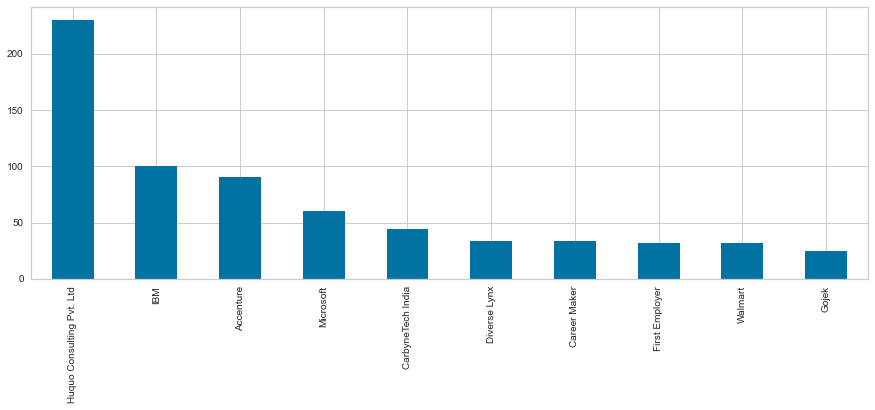

In [5]:
f,ax=plt.subplots(figsize=(15,5))
data3['companies'].value_counts().head(10).plot(kind = 'bar')

In [6]:
encoded_data.head()

,python,machine learning,it skills,data science,computer science,artificial intelligence,r,java,sql,big data
0,1,0,1,1,0,1,1,0,0,1
1,1,1,1,0,0,0,0,0,0,0
2,1,1,1,1,0,1,0,0,0,0
3,1,1,1,1,0,1,0,0,0,0
4,1,1,1,1,0,1,0,0,0,0


In [7]:
pca = PCA(n_components=10)
x_pca = pca.fit_transform(encoded_data)
new_col = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10']
x_pca_pd = pd.DataFrame(data = x_pca, columns = new_col)

In [8]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = encoded_data.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
variable,,,,,,,,,,
python,0.674066,0.367058,0.108167,-0.211277,-0.237633,0.276762,-0.155087,0.298563,0.248480,-0.215787
machine learning,0.114402,-0.335711,-0.752470,-0.498959,-0.132286,0.011878,0.102683,0.111507,-0.002915,0.135693
it skills,0.609601,-0.036687,-0.264260,0.434944,0.123729,-0.083888,-0.054749,-0.414942,-0.411785,0.030736
data science,0.255520,-0.820957,0.460875,-0.019049,-0.164559,0.074248,-0.066456,0.046481,0.039312,0.085179
computer science,-0.216674,-0.064220,-0.247900,0.506279,-0.464039,0.628383,0.024323,-0.029752,0.139028,0.012371
artificial intelligence,-0.001671,-0.091594,-0.045006,-0.073267,0.760644,0.586547,-0.220159,0.034129,0.067545,0.086019
r,0.079577,0.087531,0.201528,-0.304292,-0.009680,0.299896,0.710482,-0.507723,0.011843,-0.007750
java,0.161430,0.083359,-0.034246,0.177917,0.072815,-0.203345,0.067239,-0.103045,0.649735,0.670984
sql,-0.014597,0.214249,0.181486,-0.141886,-0.178282,0.193983,-0.049527,0.216874,-0.561054,0.683470


In [9]:
experience_split = data3['experience'].str[0:-1].str.split('-', expand=True)
experience_split.head()

,0,1
0,5,10
1,3,8
2,3,5
3,8,13
4,8,13


In [10]:
experience_split[1] =  experience_split[1].str.strip()
experience_split[1] = experience_split[1].str.replace('yr', '')
experience_split[1] = experience_split[1].str.replace(r'yr', '')
experience_split[1].head()

0    10
1     8
2     5
3    13
4    13
Name: 1, dtype: object

In [11]:
experience_split[0] = pd.to_numeric(experience_split[0], errors='coerce')
experience_split[1] = pd.to_numeric(experience_split[1], errors='coerce')


In [12]:
experience=pd.concat([experience_split[0], experience_split[1]], axis=1, sort=False)
experience.rename(columns={0:'min_experience', 1:'max_experience'}, inplace=True)
experience.head()

,min_experience,max_experience
0,5,10
1,3,8
2,3,5
3,8,13
4,8,13


In [13]:
data4=pd.concat([data3, experience], axis=1, sort=False)
data4.head()

,Unnamed: 0,Unnamed: 0.1,roles,companies,locations,experience,skills,skill index,min_experience,max_experience
0,0,0,Data Scientist - Lead / Architect Wipro,Wipro,"'Kochi', ' Kolkata', ' Pune', ' Gurgaon', ' Ch...",5-10,"'data science', 'python', 'it skills', 'artifi...",-1.0,5,10
1,1,1,Urgent Requirement || Data Scientist || Noida,HCL,"'Noida', 'Delhi'",3-8,"'it skills', 'python', 'machine learning'",-1.0,3,8
2,2,2,Global Tax Automation & Operations - Data Scie...,Dell,'Bangalore',3-5,"'artificial intelligence', 'data science', 'it...",-1.0,3,5
3,4,4,Technical Architect/ Data Scientist,DMI Innovations Pvt. Ltd,"'Noida', ' Pune', ' Chennai', 'Bangalore'",8-13,"'it skills', 'python', 'data science', 'machin...",-1.0,8,13
4,5,5,Technical Architect/ Data Scientist,DMI Innovations Pvt. Ltd,"'Noida', ' Pune', ' Chennai', 'Bangalore'",8-13,"'it skills', 'python', 'data science', 'machin...",-1.0,8,13


In [14]:
data4['avg_experience']=(data4['min_experience'].values + data4['max_experience'].values)/2

## BIPLOT

In [15]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

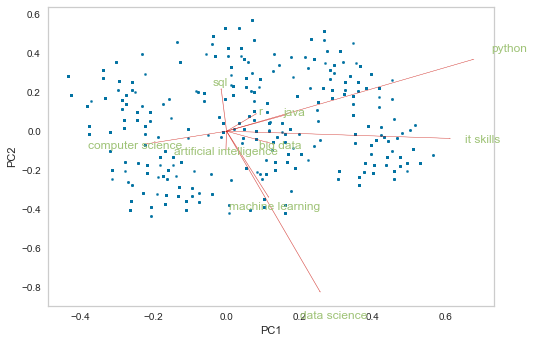

In [16]:
myplot(x_pca[:,0:2],np.transpose(loadings[0:2, :]),list(encoded_data.columns))
plt.show()

## ELBOW METHOD

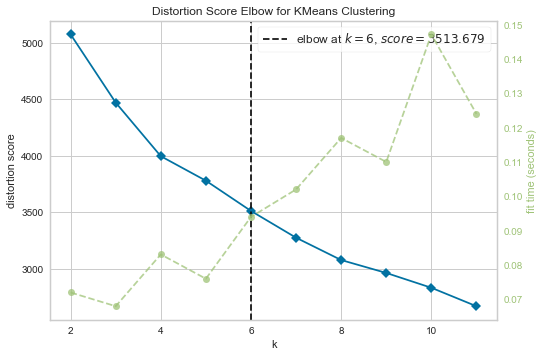

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## CLUSTERING

In [18]:
K_means = KMeans(n_clusters=6, n_init=10, verbose=0, random_state=0).fit(x_pca)

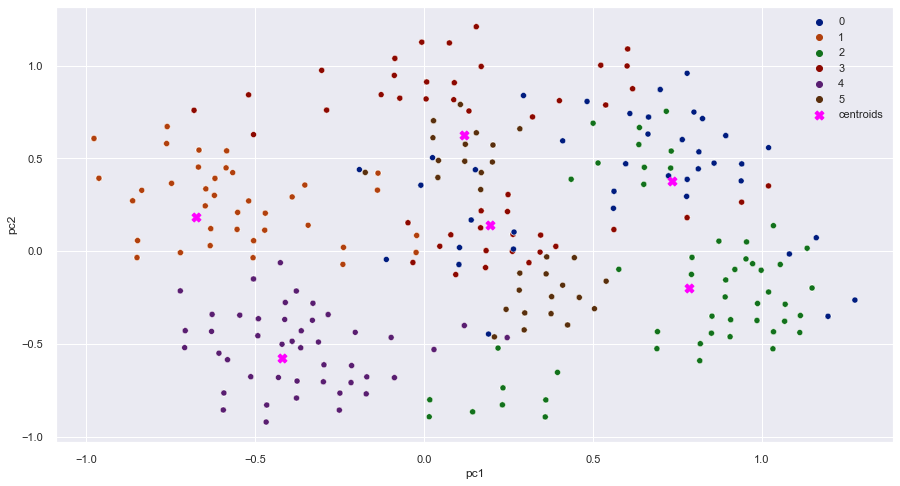

In [19]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data=x_pca_pd, x="pc1", y="pc2", hue=K_means.labels_,palette = "dark")
plt.scatter(K_means.cluster_centers_[:,0], K_means.cluster_centers_[:,1], 
            marker="X",color='magenta', s=80, label="centroids")
plt.legend(loc='upper right')
plt.show()

## SEGMENTATION

In [20]:
labels = K_means.labels_
cluster_0 = np.copy([Y[1,:]])
cluster_1 = np.copy([Y[1,:]])
cluster_2 = np.copy([Y[1,:]])
cluster_3 = np.copy([Y[1,:]])
cluster_4 = np.copy([Y[1,:]])
cluster_5 = np.copy([Y[1,:]])
# k = np.concatenate((cluster_0,[x_pca[1,:]]),axis = 0)
for i in range(len(labels)):
    if labels[i] == 0:
        cluster_0 = np.concatenate((cluster_0,[Y[i,:]]),axis = 0)
    if labels[i] == 1:
        cluster_1 = np.concatenate((cluster_1,[Y[i,:]]),axis = 0)
    if labels[i] == 2:
        cluster_2 = np.concatenate((cluster_2,[Y[i,:]]),axis = 0)
    if labels[i] == 3:
        cluster_3 = np.concatenate((cluster_3,[Y[i,:]]),axis = 0)
    if labels[i] == 4:
        cluster_4 = np.concatenate((cluster_4,[Y[i,:]]),axis = 0)
    if labels[i] == 5:
        cluster_5 = np.concatenate((cluster_5,[Y[i,:]]),axis = 0)
    
np.delete(cluster_0, 1, 0)
np.delete(cluster_1, 1, 0)
np.delete(cluster_2, 1, 0)
np.delete(cluster_3, 1, 0)
np.delete(cluster_4, 1, 0)
np.delete(cluster_5, 1, 0)
cluster_0_pd = pd.DataFrame(data = cluster_0,columns= loadings_df.index)
cluster_1_pd = pd.DataFrame(data = cluster_1,columns= loadings_df.index)
cluster_2_pd = pd.DataFrame(data = cluster_2,columns= loadings_df.index)
cluster_3_pd = pd.DataFrame(data = cluster_3,columns= loadings_df.index)
cluster_4_pd = pd.DataFrame(data = cluster_4,columns= loadings_df.index)
cluster_5_pd = pd.DataFrame(data = cluster_5,columns= loadings_df.index)


In [21]:
from collections import Counter
counts = Counter(labels)

In [22]:
per =[] #percentage
for i in range(len(counts)):
    per.append(counts[i]/3878*100)
print(per)

[5.879319236719958, 25.16761217122228, 22.382671480144403, 12.661165549252193, 21.015987622485817, 12.893243940175347]


1. BASED ON SKILLS

after segmentation

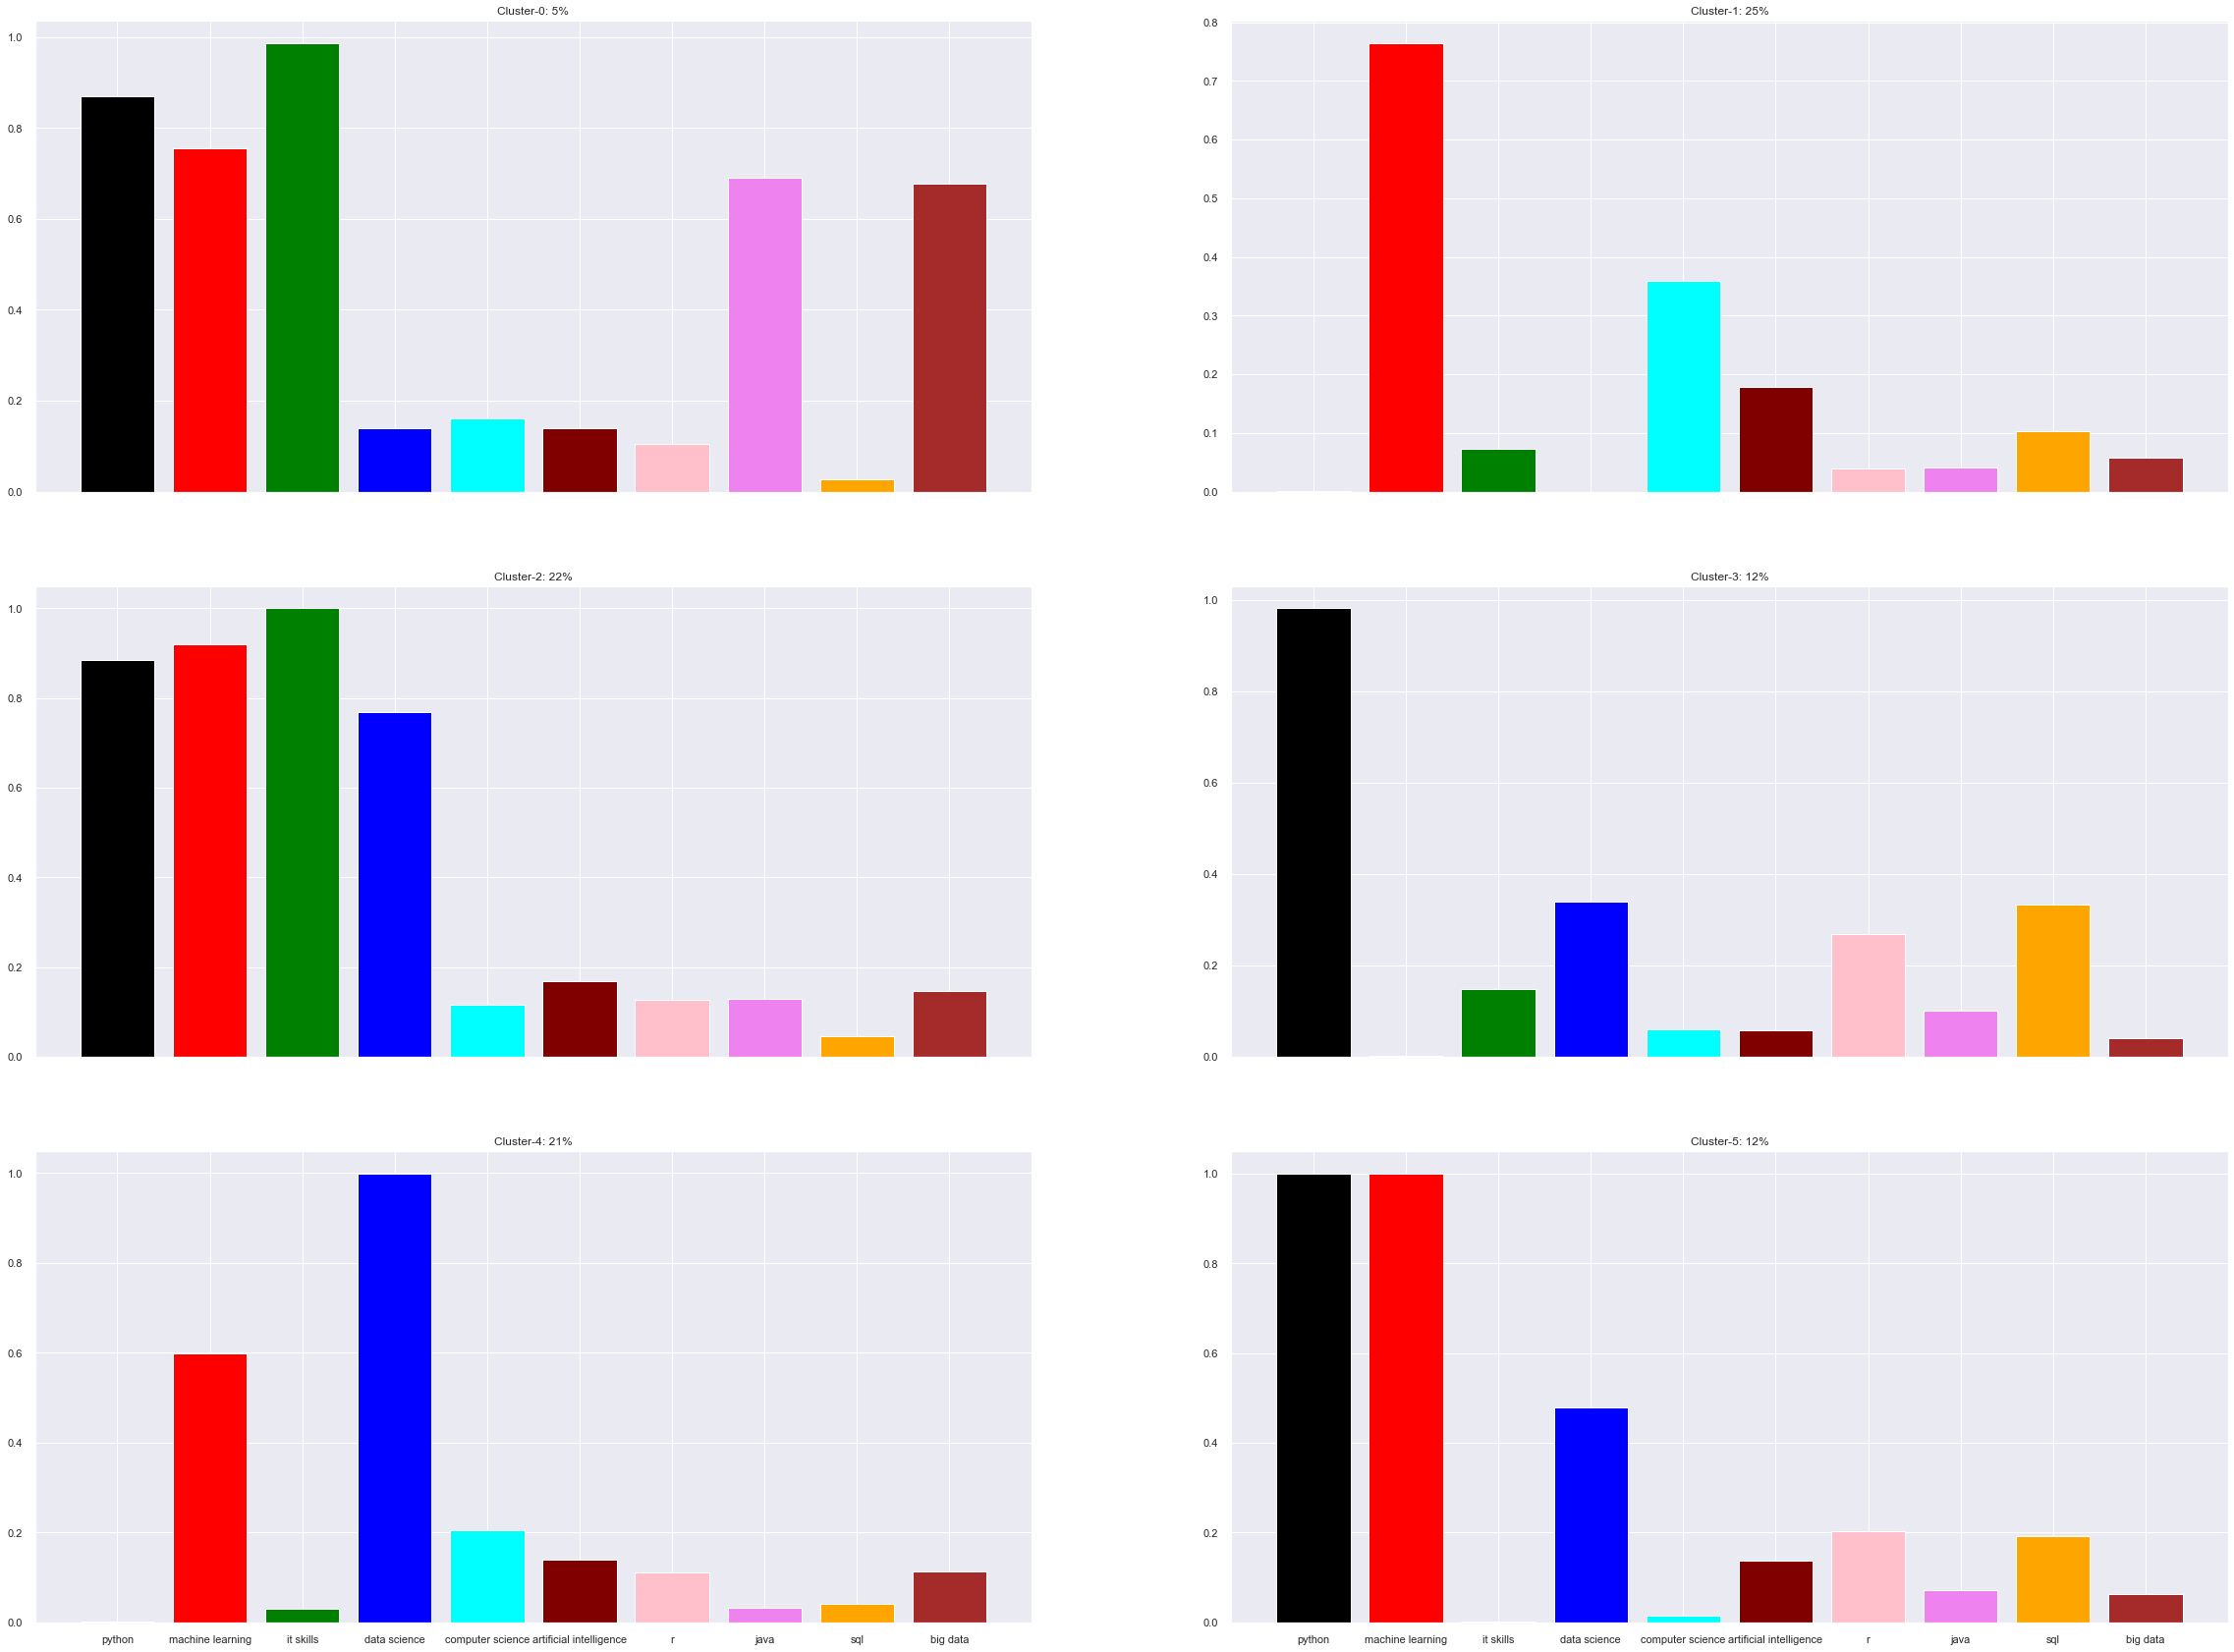

In [23]:
fig, axs = plt.subplots(3, 2, sharex=True,figsize = (40,30))

colorr = ['black', 'red', 'green', 'blue', 'cyan','maroon','pink','violet','orange','brown','yellow']
axs[0, 0].bar(cluster_0_pd.columns,cluster_0_pd.mean(),color = colorr)
axs[0, 1].bar(cluster_1_pd.columns,cluster_1_pd.mean(),color =colorr)
axs[1, 0].bar(cluster_2_pd.columns,cluster_2_pd.mean(),color =colorr)
axs[1, 1].bar(cluster_3_pd.columns,cluster_3_pd.mean(),color =colorr)
axs[2, 0].bar(cluster_4_pd.columns,cluster_4_pd.mean(),color =colorr)
axs[2, 1].bar(cluster_5_pd.columns,cluster_5_pd.mean(),color =colorr)

axs[0, 0].title.set_text("Cluster-0: 5%")
axs[0, 1].title.set_text("Cluster-1: 25%")
axs[1, 0].title.set_text("Cluster-2: 22%")
axs[1, 1].title.set_text("Cluster-3: 12%")
axs[2, 0].title.set_text("Cluster-4: 21%")
axs[2, 1].title.set_text("Cluster-5: 12%")
# fig.tight_layout()
plt.show()

2. BASED ON COMPANIES

In [24]:
data3['companies'].value_counts().head(10)

Huquo Consulting Pvt. Ltd    230
IBM                          100
Accenture                     91
Microsoft                     60
CarbyneTech India             44
Diverse Lynx                  34
Career Maker                  34
First Employer                32
Walmart                       32
Gojek                         25
Name: companies, dtype: int64

before segmentation

<AxesSubplot:>

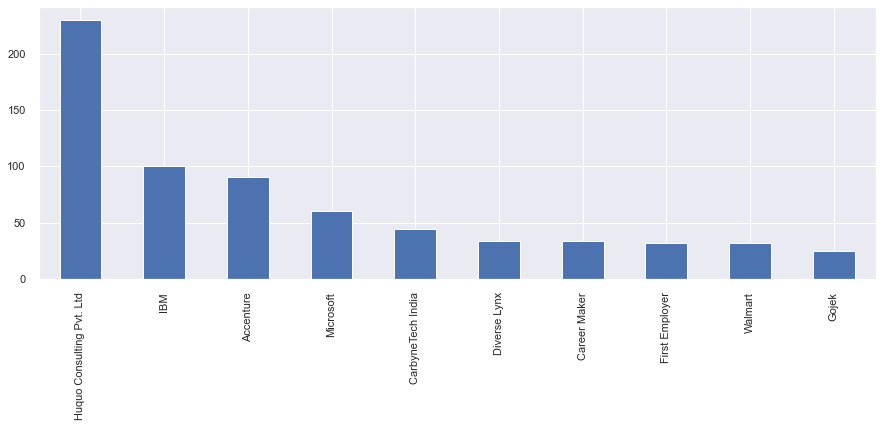

In [25]:
f,ax=plt.subplots(figsize=(15,5))
data3['companies'].value_counts().head(10).plot(kind = 'bar')

AFTER SEGMENTATION

cluster 1

<AxesSubplot:>

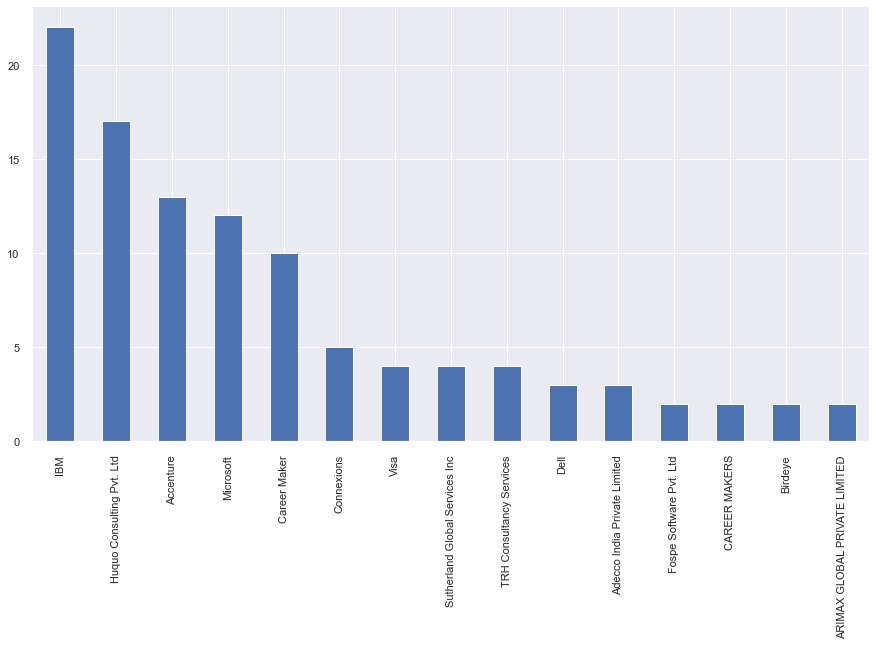

In [26]:
data4['labels'] = labels
desired_cluster  = data4[data4['labels']==0]
o = desired_cluster['companies'].value_counts()
o[:15].plot.bar()

cluster 2

<AxesSubplot:>

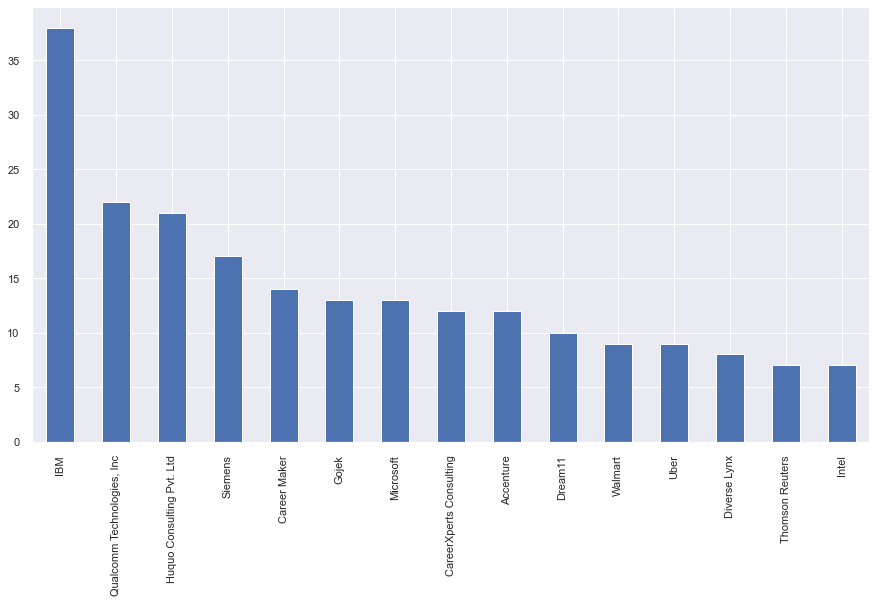

In [27]:
desired_cluster  = data4[data4['labels']==1]
o = desired_cluster['companies'].value_counts()
o[:15].plot.bar()

cluster 3

<AxesSubplot:>

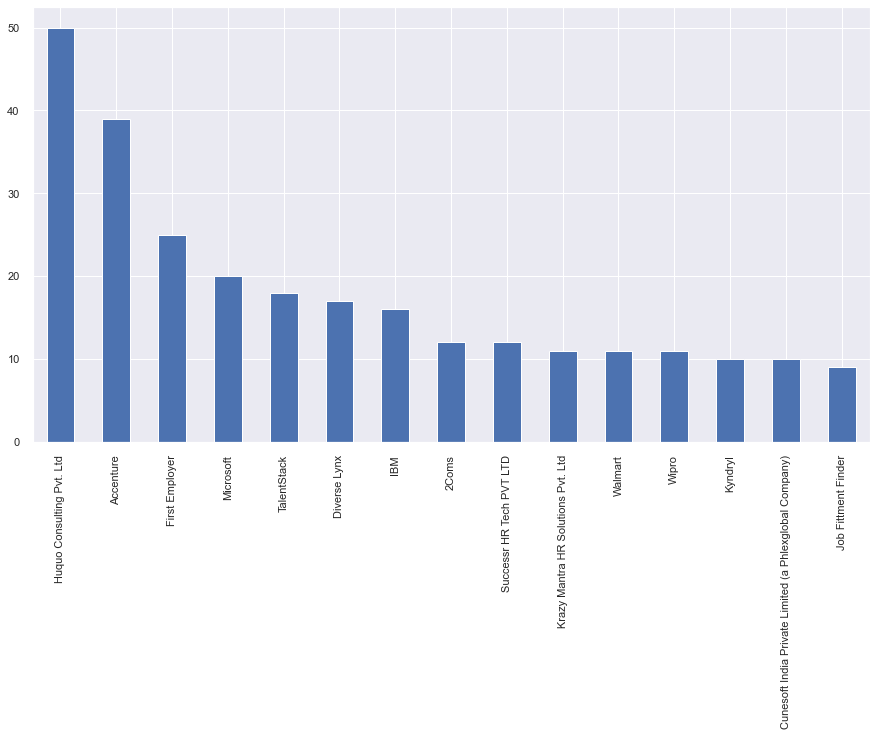

In [28]:
desired_cluster  = data4[data4['labels']==2]
o = desired_cluster['companies'].value_counts()
o[:15].plot.bar()

cluster 4

<AxesSubplot:>

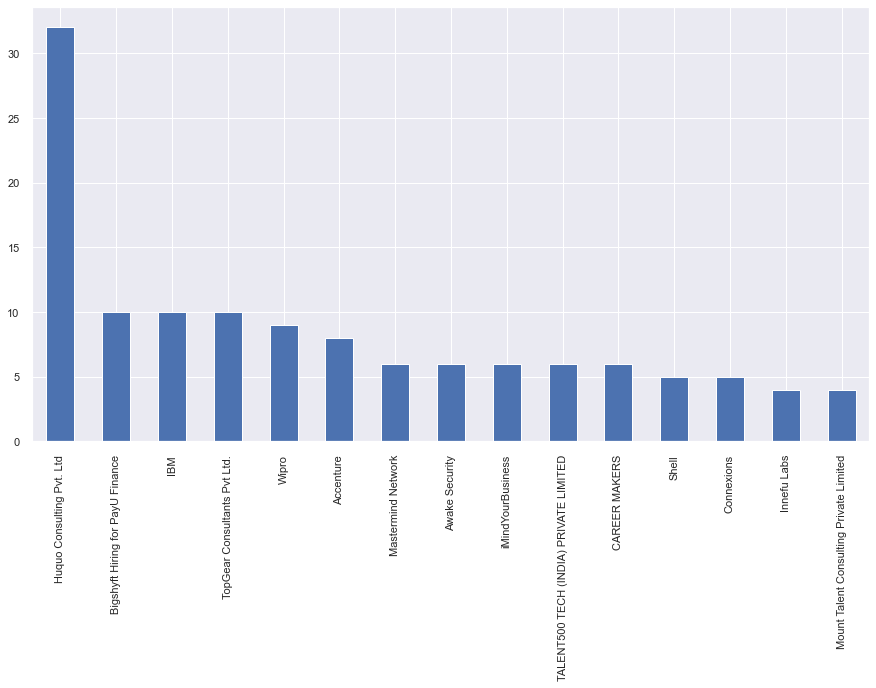

In [29]:
desired_cluster  = data4[data4['labels']==3]
o = desired_cluster['companies'].value_counts()
o[:15].plot.bar()

cluster 5

<AxesSubplot:>

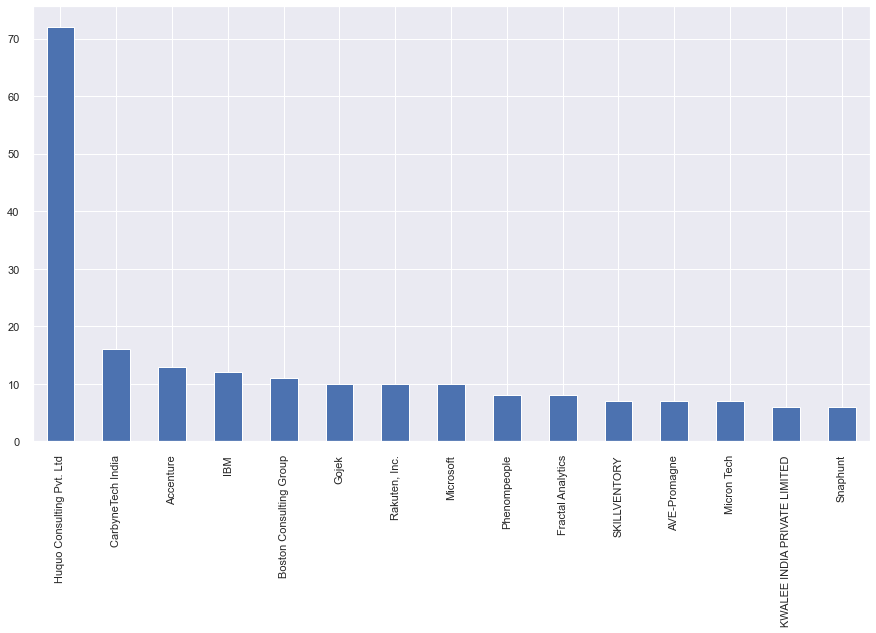

In [30]:
desired_cluster  = data4[data4['labels']==4]
o = desired_cluster['companies'].value_counts()
o[:15].plot.bar()

cluster 6

<AxesSubplot:>

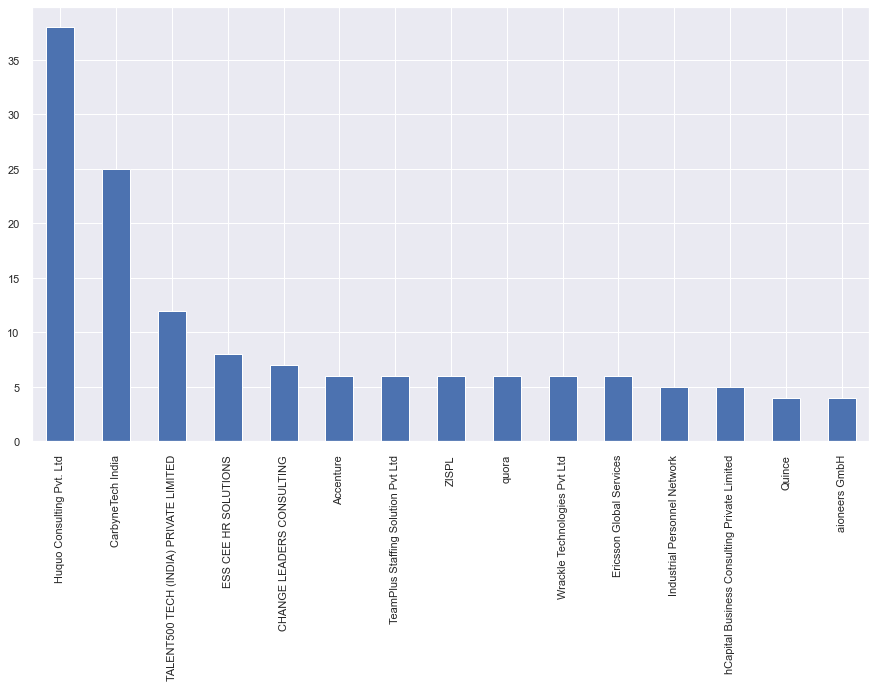

In [31]:
desired_cluster  = data4[data4['labels']==5]
o = desired_cluster['companies'].value_counts()
o[:15].plot.bar()

3. BASED ON EXPERIENCE

before segmentation

<AxesSubplot:xlabel='companies'>

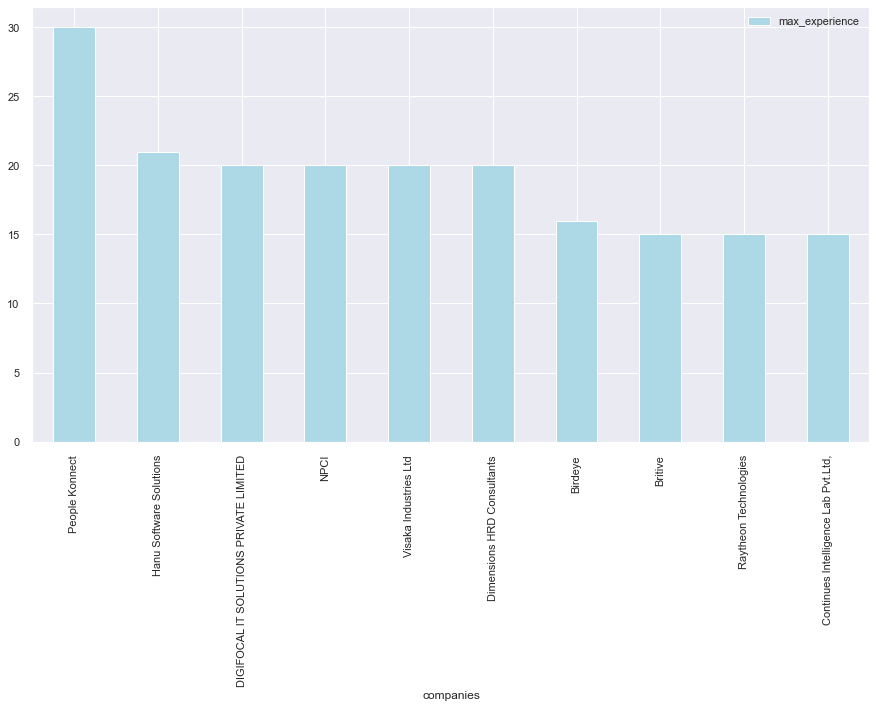

In [32]:
data4[['max_experience','companies']].groupby(["companies"]).median().sort_values(by='max_experience',ascending=False).head(10).plot.bar(color='lightblue')

<AxesSubplot:xlabel='companies'>

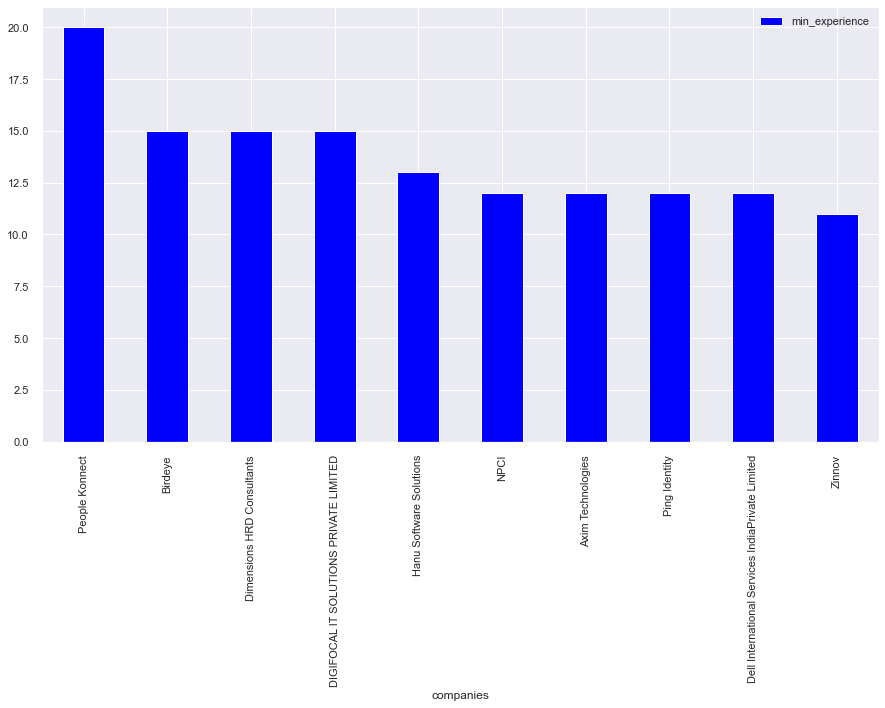

In [33]:
data4[['min_experience','companies']].groupby(["companies"]).median().sort_values(by='min_experience',ascending=False).head(10).plot.bar(color='blue')

<AxesSubplot:xlabel='companies'>

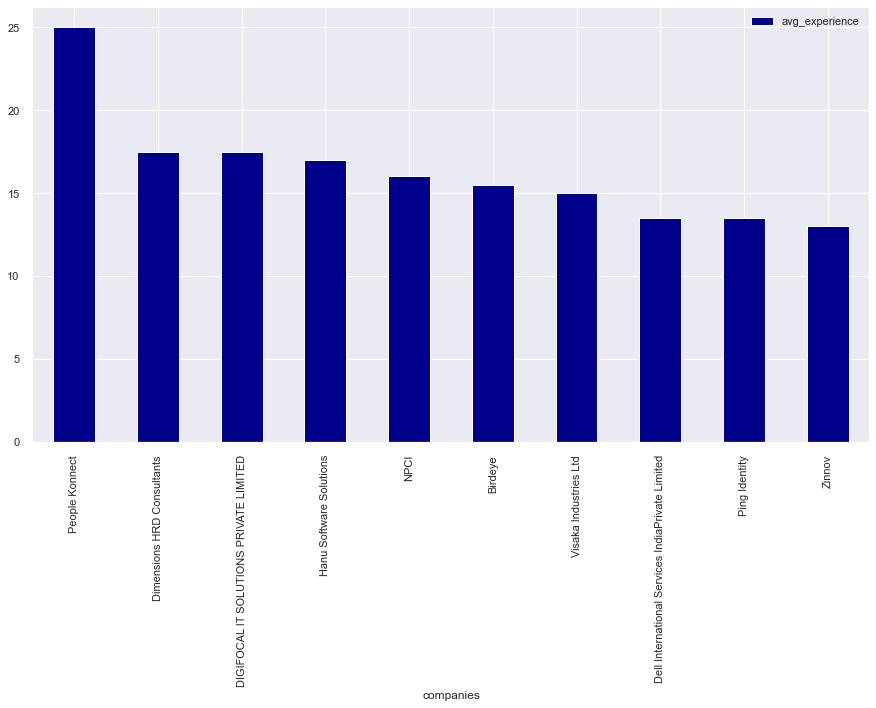

In [34]:
data4[['avg_experience','companies']].groupby(["companies"]).median().sort_values(by='avg_experience',ascending=False).head(10).plot.bar(color='darkblue')

after segmentation

<AxesSubplot:xlabel='companies'>

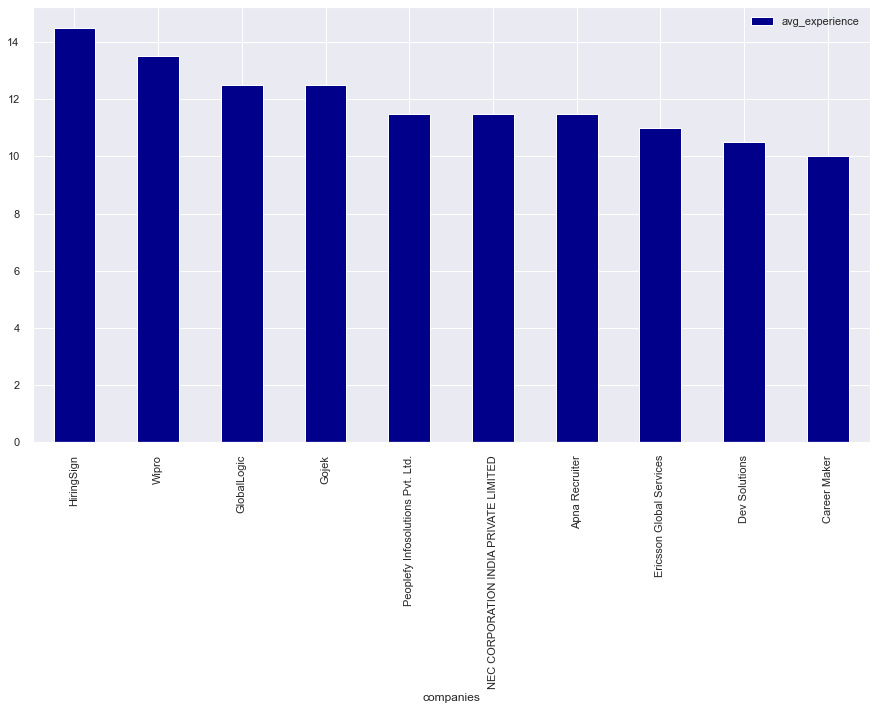

In [35]:
desired_cluster[['avg_experience','companies']].groupby(["companies"]).median().sort_values(by='avg_experience',ascending=False).head(10).plot.bar(color='darkblue')

<AxesSubplot:xlabel='companies'>

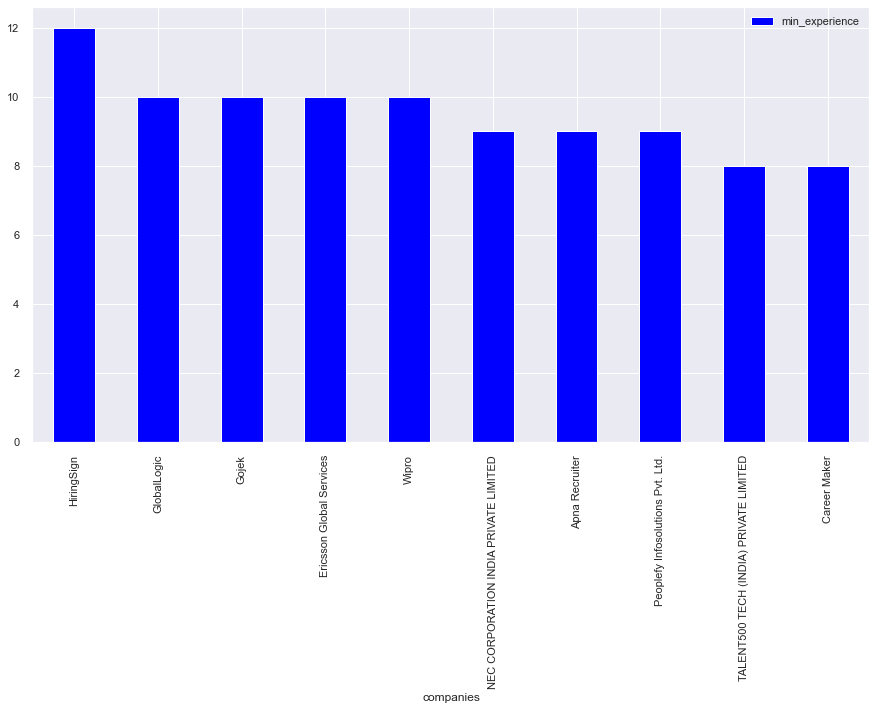

In [36]:
desired_cluster[['min_experience','companies']].groupby(["companies"]).median().sort_values(by='min_experience',ascending=False).head(10).plot.bar(color='blue')

## TOTAL NO OF EACH SKILL IN ORIGINAL DATASET

In [37]:
skills =list(encoded_data.columns)
skills_dict = dict.fromkeys(skills)
skill_count =[]
for i in range(10):
    skill_count.append(list(encoded_data.iloc[:,i].value_counts()))
incr = 0
for keys in skills_dict.keys():
    skills_dict[keys] = skill_count[incr]
    incr+=1
print(skills_dict)

{'python': [1947, 1931], 'machine learning': [2704, 1174], 'it skills': [2618, 1260], 'data science': [1955, 1923], 'computer science': [3184, 694], 'artificial intelligence': [3313, 565], 'r': [3380, 498], 'java': [3455, 423], 'sql': [3436, 442], 'big data': [3395, 483]}


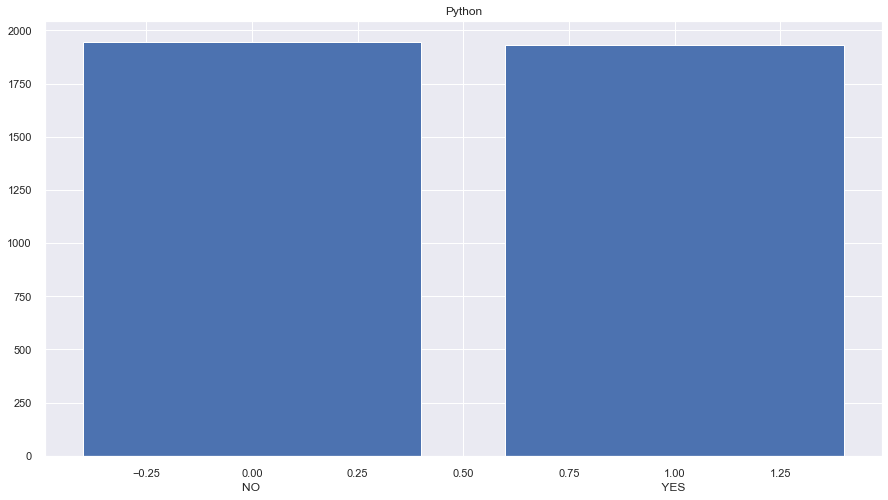

In [38]:
plt.bar(data='python',height=skills_dict['python'],x = [0,1])
plt.title('Python')
plt.xlabel('NO                                                                                                                       YES')
plt.show()


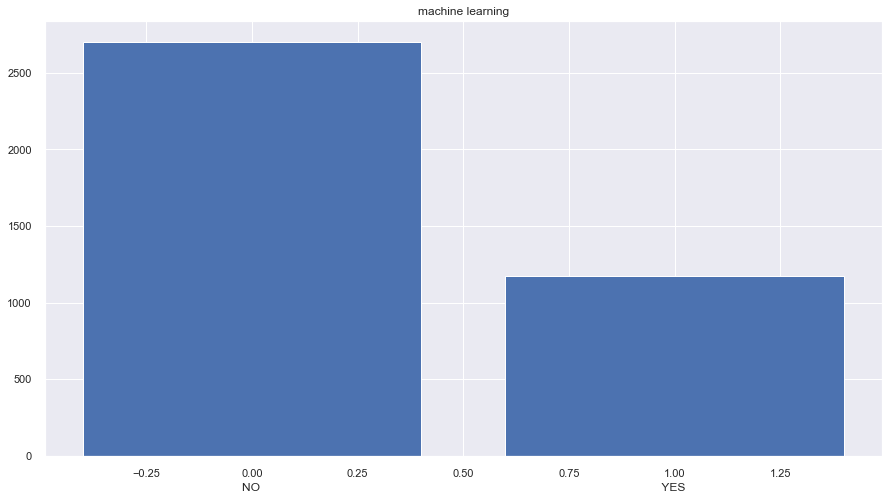

In [39]:
plt.bar(data='machine learning',height=skills_dict['machine learning'],x = [0,1])
plt.title('machine learning')
plt.xlabel('NO                                                                                                                       YES')
plt.show()



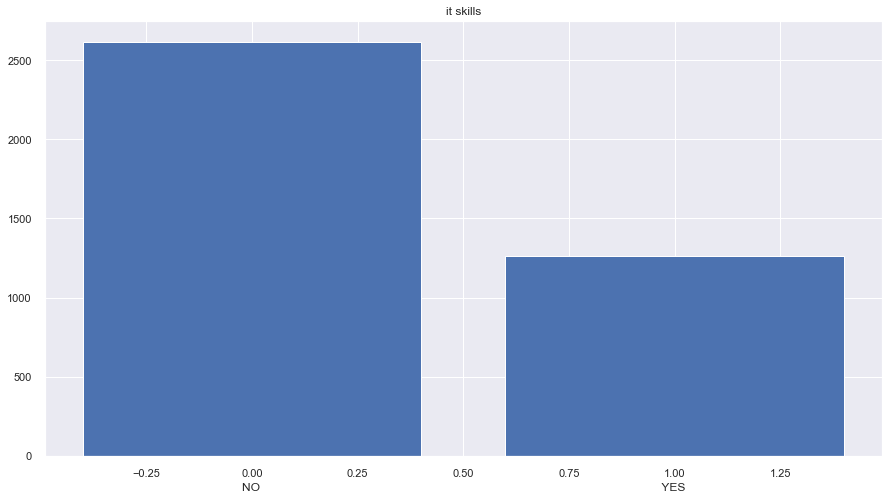

In [40]:
plt.bar(data='it skills',height=skills_dict['it skills'],x = [0,1])
plt.title('it skills')
plt.xlabel('NO                                                                                                                       YES')
plt.show()


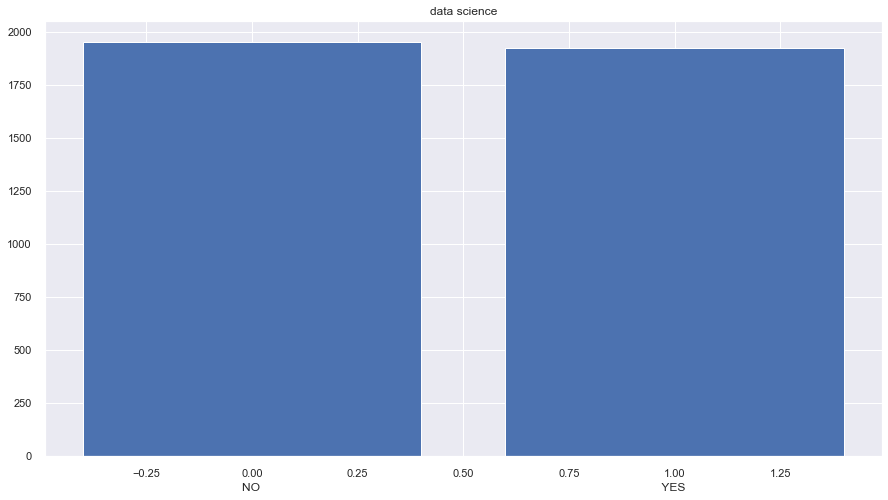

In [41]:
plt.bar(data='data science',height=skills_dict['data science'],x = [0,1])
plt.title('data science')
plt.xlabel('NO                                                                                                                       YES')
plt.show()



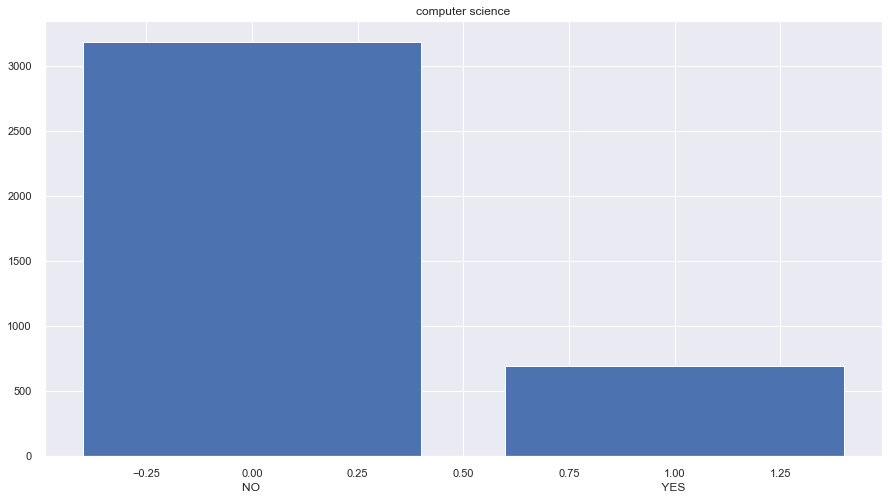

In [42]:
plt.bar(data='computer science',height=skills_dict['computer science'],x = [0,1])
plt.title('computer science')
plt.xlabel('NO                                                                                                                       YES')
plt.show()



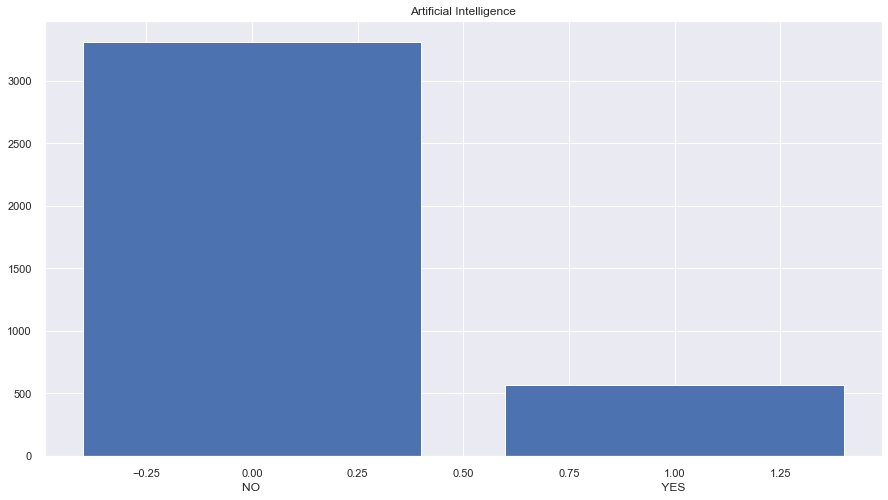

In [43]:
plt.bar(data='artificial intelligence',height=skills_dict['artificial intelligence'],x = [0,1])
plt.title('Artificial Intelligence')
plt.xlabel('NO                                                                                                                       YES')
plt.show()



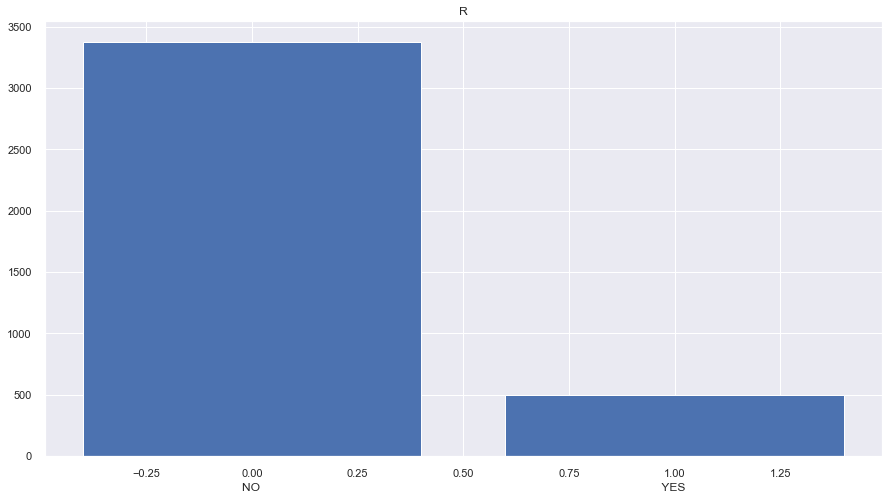

In [44]:
plt.bar(data='r',height=skills_dict['r'],x = [0,1])
plt.title('R')
plt.xlabel('NO                                                                                                                       YES')
plt.show()



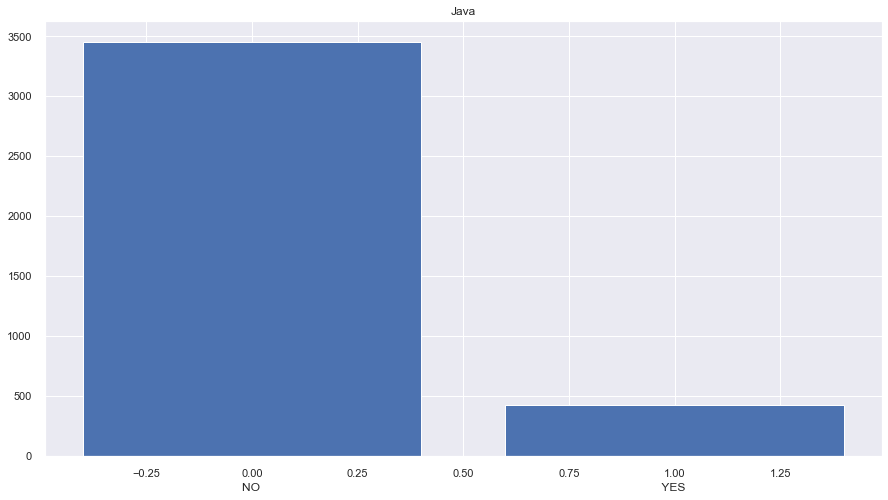

In [45]:
plt.bar(data='java',height=skills_dict['java'],x = [0,1])
plt.title('Java')
plt.xlabel('NO                                                                                                                       YES')
plt.show()



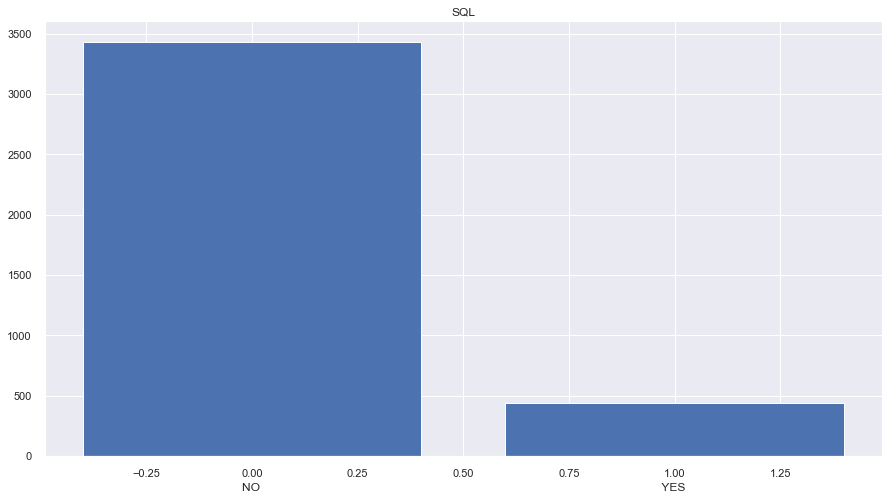

In [46]:
plt.bar(data='sql',height=skills_dict['sql'],x = [0,1])
plt.title('SQL')
plt.xlabel('NO                                                                                                                       YES')
plt.show()



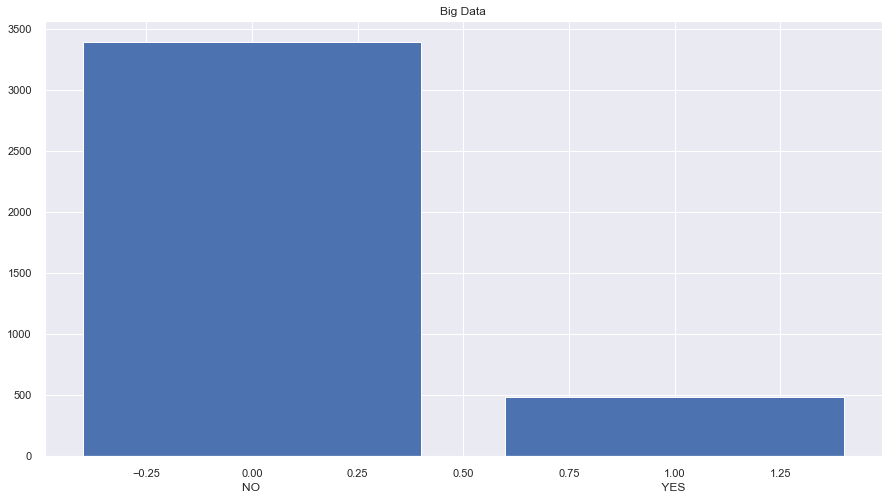

In [47]:
plt.bar(data='big data',height=skills_dict['big data'],x = [0,1])
plt.title('Big Data')
plt.xlabel('NO                                                                                                                       YES')
plt.show()
